In [1]:
!pip install beautifulsoup4
!pip install requests
!pip install matplotlib
!pip install schedule
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.3 MB/s eta 0:00:00



Menu:
0. Afficher les informations sur le programme
1. Collecter les prix des actions et les stocker dans un fichier texte
2. Afficher les prix des actions les plus récents avec la date et l'heure
3. Afficher le graphique des cours des actions
4. Afficher les informations sur la variation du cours des actions
5. Quitter
Veuillez choisir une option (0-5): 
0

--------------------------------------------------------------------------
Ce programme collecte les prix des actions Airbus, Air Liquide et Sanofi
à partir du site boursorama.com et les stocke dans un fichier texte.
Vous pouvez également afficher les derniers prix collectés,
générer un graphique des cours des actions et quitter le programme.
--------------------------------------------------------------------------
Projet: OSINT Bourse
--------------------------------------------------------------------------

Menu:
0. Afficher les informations sur le programme
1. Collecter les prix des actions et les stocker dans un fichier text

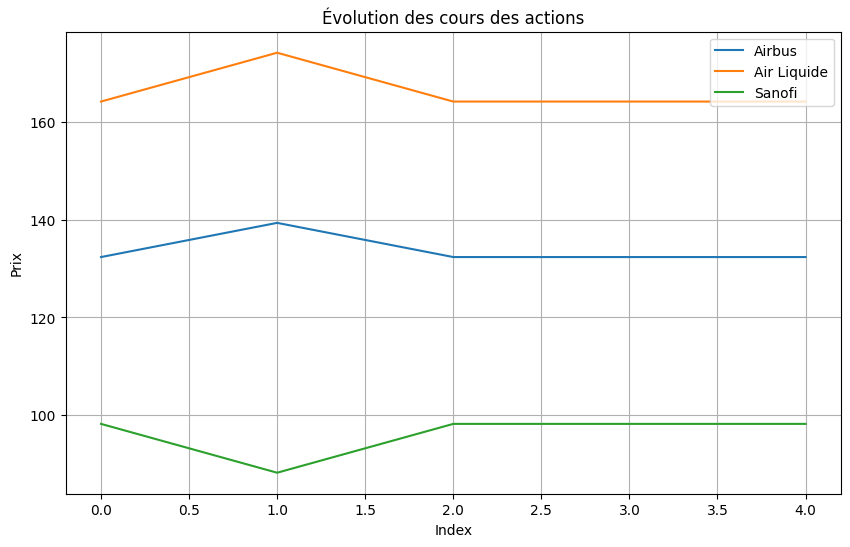


Menu:
0. Afficher les informations sur le programme
1. Collecter les prix des actions et les stocker dans un fichier texte
2. Afficher les prix des actions les plus récents avec la date et l'heure
3. Afficher le graphique des cours des actions
4. Afficher les informations sur la variation du cours des actions
5. Quitter
Veuillez choisir une option (0-5): 
4
Aujourd'hui, la variation du cours des actions: 

Variation du cours: +1.30%
Variation du cours: +0.61%
Variation du cours: +0.43%

Menu:
0. Afficher les informations sur le programme
1. Collecter les prix des actions et les stocker dans un fichier texte
2. Afficher les prix des actions les plus récents avec la date et l'heure
3. Afficher le graphique des cours des actions
4. Afficher les informations sur la variation du cours des actions
5. Quitter
Veuillez choisir une option (0-5): 
5
Programme terminé.


In [36]:
# Import des bibliothèques
import requests
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt

# Liste des URL que je souhaite scrapper
urls = {
    'Airbus': 'https://www.boursorama.com/cours/1rPAIR/',
    'Air Liquide': 'https://www.boursorama.com/cours/1rPAI/',
    'Sanofi': 'https://www.boursorama.com/cours/1rPSAN/'
}

# Fonction pour récupérer le prix d'une action
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    price_element = soup.find('span', class_='c-instrument c-instrument--last')

    if price_element is not None:
        price = price_element.text.strip()
        return price
    else:
        return 'Prix non disponible'

# Fonction pour récupérer la variation du prix d'une action dans la journée
def get_stock_variation(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    variation_element = soup.find('span', class_='c-instrument c-instrument--variation')

    if variation_element is not None:
        variation = variation_element.text.strip()
        print(f"Variation du cours: {variation}")
    else:
        print('Variation non disponible')


# Fonction pour collecter les prix des actions et les stocker dans un fichier texte
def collect_stock_prices():
    current_datetime = datetime.datetime.now()
    current_date = current_datetime.strftime("%Y-%m-%d")
    current_time = current_datetime.strftime("%H:%M:%S")

    with open("stock_prices.txt", "a") as file:
        file.write(f"Date: {current_date}, Heure: {current_time}\n")

        for action, url in urls.items():
            price = get_stock_price(url)
            file.write(f"{action}: {price}\n")


# Fonction pour afficher les prix des actions les plus récents avec la date et l'heure
def print_last_prices():
    with open("stock_prices.txt", "r") as file:
        lines = file.readlines()
        last_prices = lines[-4:]

        print("Prix des actions les plus récents :")
        for line in last_prices:
            print(line.strip())

def show_stock_prices_graph():
    timestamps = []
    prices_airbus = []
    prices_air_liquide = []
    prices_sanofi = []

    with open("stock_prices.txt", "r") as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("Date:"):
                continue

            line = line.strip()
            if line:
                # Extraire le nom de l'action et le prix
                action, price = line.split(":")
                action = action.strip()
                price = float(price.strip())

                if action == "Airbus":
                    prices_airbus.append(price)
                elif action == "Air Liquide":
                    prices_air_liquide.append(price)
                elif action == "Sanofi":
                    prices_sanofi.append(price)

    # Génération du graphique
    plt.figure(figsize=(10, 6))
    plt.plot(prices_airbus, label="Airbus")
    plt.plot(prices_air_liquide, label="Air Liquide")
    plt.plot(prices_sanofi, label="Sanofi")
    plt.xlabel('Index')
    plt.ylabel('Prix')
    plt.title('Évolution des cours des actions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fonction pour afficher des informations sur le programme
def show_program_info():
    print("\n--------------------------------------------------------------------------")
    print("Ce programme collecte les prix des actions Airbus, Air Liquide et Sanofi")
    print("à partir du site boursorama.com et les stocke dans un fichier texte.")
    print("Vous pouvez également afficher les derniers prix collectés,")
    print("générer un graphique des cours des actions et quitter le programme.")
    print("--------------------------------------------------------------------------")
    print("Projet: OSINT Bourse")
    print("--------------------------------------------------------------------------")


# Programme principal (Main)
while True:
    print("\nMenu:")
    print("0. Afficher les informations sur le programme")
    print("1. Collecter les prix des actions et les stocker dans un fichier texte")
    print("2. Afficher les prix des actions les plus récents avec la date et l'heure")
    print("3. Afficher le graphique des cours des actions")
    print("4. Afficher les informations sur la variation du cours des actions")
    print("5. Quitter")

    choix = input("Veuillez choisir une option (0-5): \n")

    if choix == '1':
        collect_stock_prices()
        print("Prix des actions collectés et stockés.")

    elif choix == '2':
        print("Les derniers prix des actions collectés: \n")
        print_last_prices()

    elif choix == '3':
        print("Evolution du cours des actions: \n")
        show_stock_prices_graph()

    elif choix == '0':
        show_program_info()

    elif choix == '4':
        print("Aujourd'hui, la variation du cours des actions: \n")
        for action, url in urls.items():
            get_stock_variation(url)

    elif choix == '5':
        print("Programme terminé.")
        break

    else:
        print("Option invalide. Veuillez réessayer.")
